In [13]:
import matplotlib.pyplot as plt
import pickle
import os
import torch
import numpy as np
from utils import get_dataloader,get_model
from easydict import EasyDict as edict
from tqdm.auto import tqdm
import torch.nn as nn

In [2]:
base_path = "save/"

In [3]:
def retreival_process(data,target_num_entries=100):
    num_entries = len(data)
    entries_per_group = num_entries // target_num_entries
    averaged_data = [sum(data[i:i + entries_per_group]) / entries_per_group for i in range(0, num_entries, entries_per_group)]
    return averaged_data

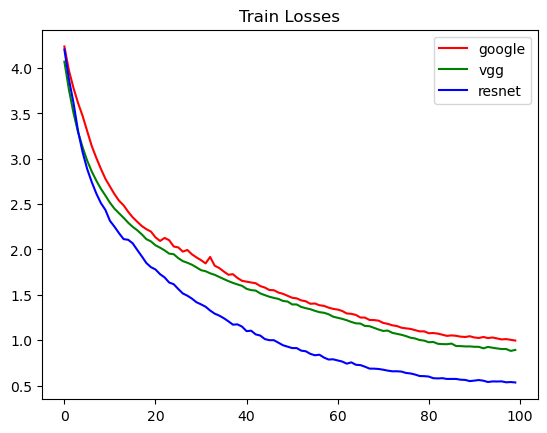

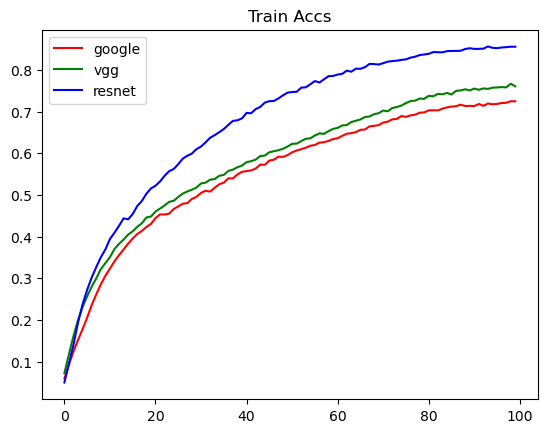

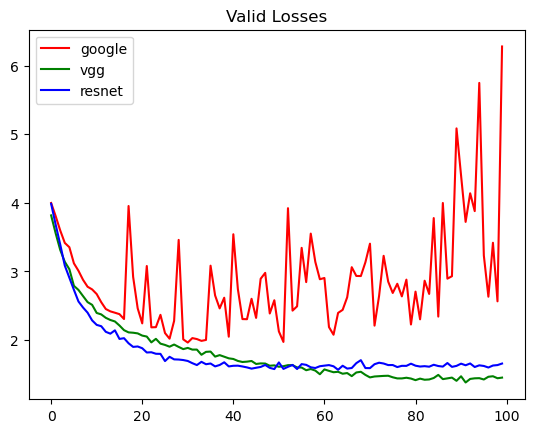

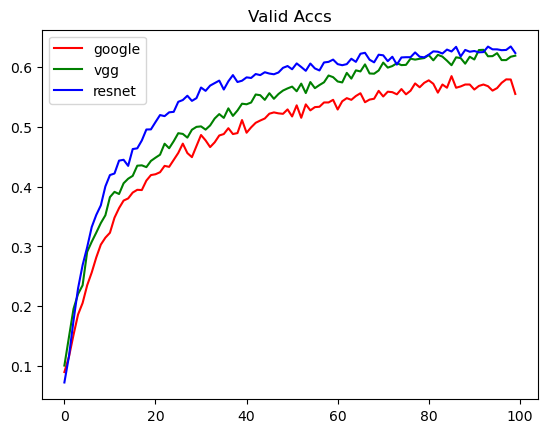

In [4]:
models = ["google","vgg","resnet","effnet"]
train_losses = []
train_accs = []
valid_losses = []
valid_accs = []
for i,model in enumerate(models):
    file_path = f"{base_path}{model}_loss_acc.pkl"
    if os.path.exists(file_path):
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
            train_losses.append(retreival_process(data[0]))
            train_accs.append(retreival_process(data[1]))
            valid_losses.append(retreival_process(data[2]))
            valid_accs.append(retreival_process(data[3]))

with open(f"{base_path}effnet_loss_acc_fromlog.pkl", "rb")as f:
    eff_data = pickle.load(f)
    train_losses.append(eff_data[0])
    train_accs.append(eff_data[1])
    valid_losses.append(eff_data[2])
    valid_accs.append(eff_data[3])
            
colors = ["-r","-g","-b","-y"]
for i,l in enumerate(train_losses):
    plt.plot(l,colors[i], label=models[i])
plt.title('Train Losses')
plt.legend()
plt.show()
for i,l in enumerate(train_accs):
    plt.plot(l,colors[i], label=models[i])
plt.title('Train Accs')
plt.legend()
plt.show()
for i,l in enumerate(valid_losses):
    plt.plot(l,colors[i], label=models[i])
plt.title('Valid Losses')
plt.legend()
plt.show() 
for i,l in enumerate(valid_accs):
    plt.plot(l,colors[i], label=models[i])
plt.title('Valid Accs')
plt.legend()
plt.show()

In [26]:
train_time = [15006.616212368011,35471.431861400604,19936.93428850174,35214.703113596965]
test_accs = [0.36601,0.32300,0.41114,0.38460]
colors = ["red", "green", "blue", "yellow"]

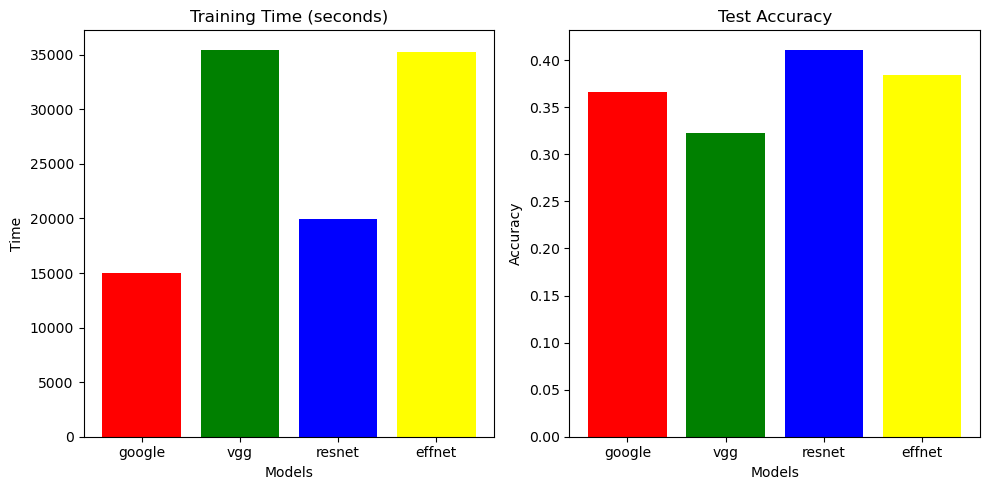

In [27]:
import matplotlib.pyplot as plt

models = ["google", "vgg", "resnet", "effnet"]
train_time = [15006.616212368011, 35471.431861400604, 19936.93428850174, 35214.703113596965]
test_accs = [0.36601, 0.32300, 0.41114, 0.38460]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, train_time, color=colors)
plt.title('Training Time (seconds)')
plt.xlabel('Models')
plt.ylabel('Time')

plt.subplot(1, 2, 2)
plt.bar(models, test_accs, color=colors)
plt.title('Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()